In [2]:
import json
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from os import path
from nltk import sent_tokenize, word_tokenize
from utils import map_nltk_lang
from statistics import mean

In [3]:
# Config
base_dir = "final_data"
sns.set_theme(style="white", context="talk")
sns.set_context('notebook')

In [4]:
with open(path.join(base_dir, "final_data.json"), "r", encoding="utf-8") as f:
    json_data = json.load(f)

In [5]:
test_data = {}
for lang, pairs in json_data.items():
    test_data[lang] = pairs[:20]
json_data = test_data

# Instances

In [31]:
data = {
    'lang': json_data.keys(),
    'instances': [len(a) for a in json_data.values()],
    'split': ["train" if len(x) > 500 else "test" for x in json_data.values()],
}
df = pd.DataFrame(data)

In [32]:
df.head()

,lang,instances,split
0,en,5646,train
1,es,5631,train
2,fr,3791,train
3,fa,718,train
4,pt,640,train


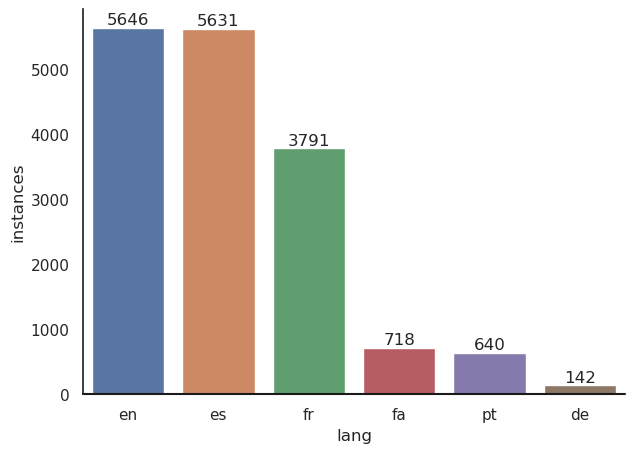

In [33]:
f, ax1 = plt.subplots(1, 1, figsize=(7, 5), sharex=True)

sns.barplot(x="lang", y="instances", data=df, ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.bar_label(ax1.containers[0], fmt='%1.f')

sns.despine(bottom=True)

## Train/Test/Dev Splits

In [9]:
with open(path.join(base_dir, "final_data_split.json"), "r", encoding="utf-8") as f:
    json_data_split = json.load(f)

In [84]:
split_data = {"lang": [], "instances": [], "split": []}

for lang, splits in json_data_split.items():    
    split_data["lang"].append(lang)
    split_data["instances"].append(sum([len(x) for x in splits.values()]))
    split_data["split"].append("all")

    for split, articles in splits.items():
        split_data["lang"].append(lang)
        split_data["instances"].append(len(articles))
        split_data["split"].append(split)

In [85]:
df_split = pd.DataFrame(data=split_data)

In [86]:
df_split.head()

,lang,instances,split
0,en,5646,all
1,en,4516,train
2,en,565,test
3,en,565,valid
4,es,5631,all


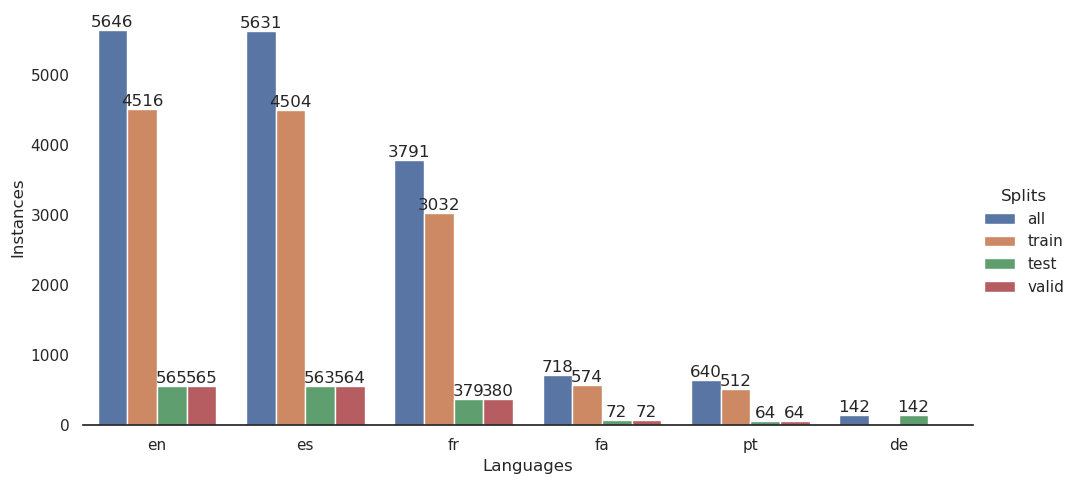

In [88]:
g = sns.catplot(data=df_split, kind="bar", x="lang", y="instances", hue="split", errorbar="sd", height=5, aspect=2)
g.despine(left=True)
g.set_axis_labels("Languages", "Instances")
g.legend.set_title("Splits")

ax = g.facet_axis(0, 0)

for c in ax.containers:
    labels = [int(v.get_height()) if not math.isnan(v.get_height()) else "" for v in c]
    ax.bar_label(c, labels=labels)

## Sents

In [33]:
sents_data = {"lang": [], "value": [], "src_sents_count": [], "tgt_sents_count": []}
for lang, articles in json_data.items():
    src_sents_len = []
    tgt_sents_len = []
    
    for article in articles:
        src_sents_len.append(len(sent_tokenize(article["src"], language=map_nltk_lang(lang))))
        tgt_sents_len.append(len(sent_tokenize(article["tgt"], language=map_nltk_lang(lang))))
        
    sents_data["lang"].append(lang)
    sents_data["value"].append("min")
    sents_data["src_sents_count"].append(min(src_sents_len))
    sents_data["tgt_sents_count"].append(min(tgt_sents_len))
    
    sents_data["lang"].append(lang)
    sents_data["value"].append("max")
    sents_data["src_sents_count"].append(max(src_sents_len))
    sents_data["tgt_sents_count"].append(max(tgt_sents_len))
    
    sents_data["lang"].append(lang)
    sents_data["value"].append("avg")
    sents_data["src_sents_count"].append(round(mean(src_sents_len), 2))
    sents_data["tgt_sents_count"].append(round(mean(tgt_sents_len), 2))


df_sents = pd.DataFrame(data=sents_data)

In [44]:
df_sents.head()

,lang,value,src_sents_count,tgt_sents_count
0,en,min,4.00,1.00
1,en,max,52.00,48.00
2,en,avg,16.42,11.92
3,es,min,5.00,1.00
4,es,max,53.00,48.00


In [77]:
df_avg_sents = df_sents[df_sents["value"] == "avg"]

df_avg_sents_src = df_avg_sents[["lang", "src_sents_count"]]
df_avg_sents_src = df_avg_sents_src.rename(columns={"src_sents_count": "avg"})
df_avg_sents_src["src/tgt"] = "src"

df_avg_sents_tgt = df_avg_sents[["lang", "tgt_sents_count"]]
df_avg_sents_tgt = df_avg_sents_tgt.rename(columns={"tgt_sents_count": "avg"})
df_avg_sents_tgt["src/tgt"] = "tgt"

df_avg_sents_test = pd.concat([df_avg_sents_test, df_avg_sents_test2])

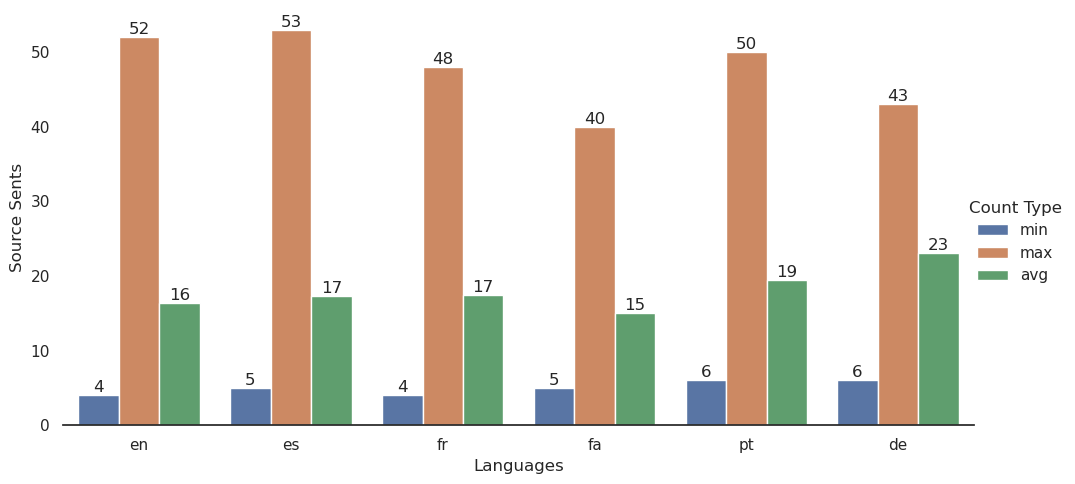

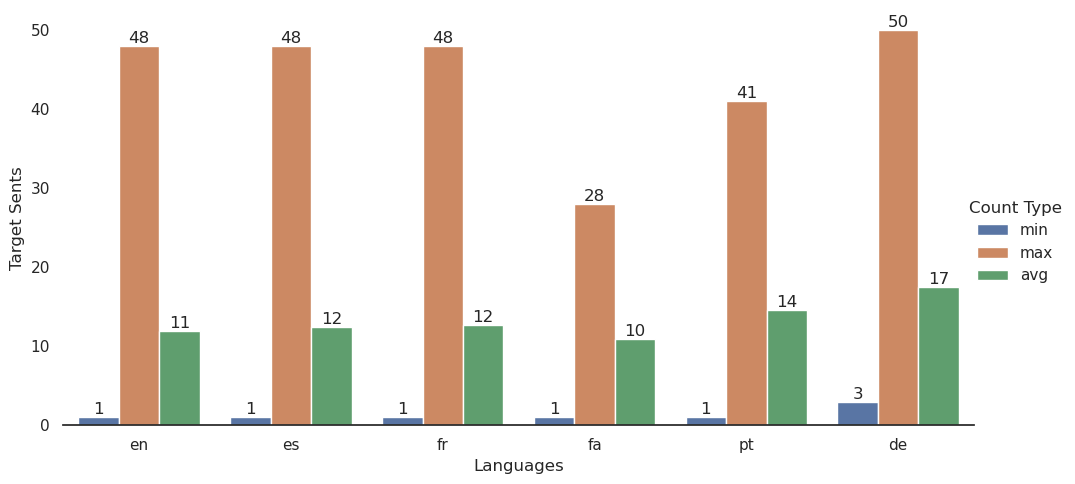

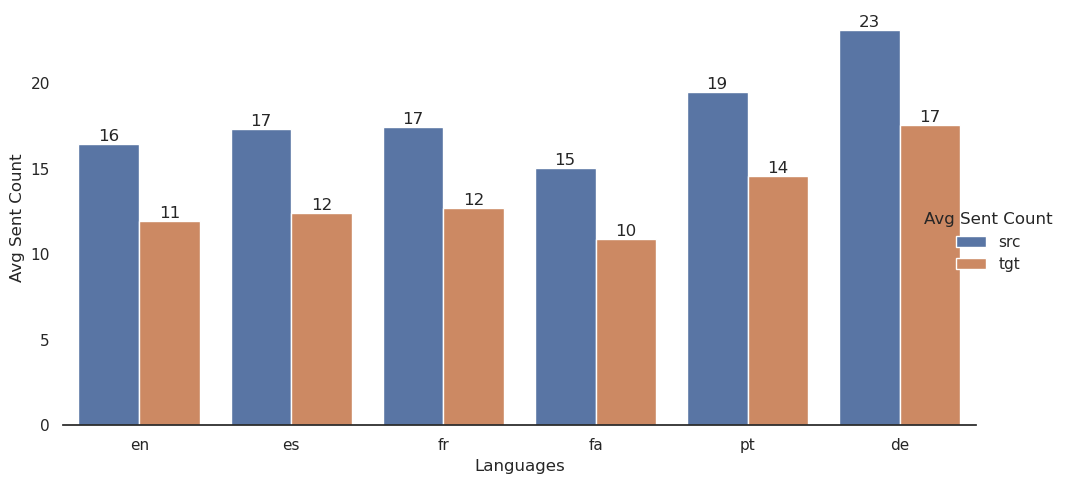

In [107]:
# Source Sents
g2 = sns.catplot(
    data=df_sents,
    kind="bar",
    x="lang",
    y="src_sents_count",
    hue="value",
    errorbar="sd",
    height=5,
    aspect=2,
)
g2.despine(left=True)
g2.set_axis_labels("Languages", "Source Sents")
g2.legend.set_title("Count Type")

ax2 = g2.facet_axis(0, 0)

for c in ax2.containers:
    labels = [int(v.get_height()) if not math.isnan(v.get_height()) else "" for v in c]
    ax2.bar_label(c, labels=labels)

# Target Sents
g3 = sns.catplot(
    data=df_sents,
    kind="bar",
    x="lang",
    y="tgt_sents_count",
    hue="value",
    errorbar="sd",
    height=5,
    aspect=2,
)
g3.despine(left=True)
g3.set_axis_labels("Languages", "Target Sents")
g3.legend.set_title("Count Type")

ax3 = g3.facet_axis(0, 0)

for c in ax3.containers:
    labels = [int(v.get_height()) if not math.isnan(v.get_height()) else "" for v in c]
    ax3.bar_label(c, labels=labels)
    
# Avg Sent Count
g4 = sns.catplot(
    data=df_avg_sents_test,
    kind="bar",
    x="lang",
    y="avg",
    hue="src/tgt",
    errorbar="sd",
    height=5,
    aspect=2,
)
g4.despine(left=True)
g4.set_axis_labels("Languages", "Avg Sent Count")
g4.legend.set_title("Avg Sent Count")

ax4 = g4.facet_axis(0, 0)

for c in ax4.containers:
    labels = [int(v.get_height()) if not math.isnan(v.get_height()) else "" for v in c]
    ax4.bar_label(c, labels=labels)

# Tokens

In [97]:
token_data = {"lang": [], "value": [], "src_token_count": [], "tgt_token_count": []}
for lang, articles in json_data.items():
    src_token_len = []
    tgt_token_len = []
    
    for article in articles:
        src_token_len.append(len(word_tokenize(article["src"], language=map_nltk_lang(lang))))
        tgt_token_len.append(len(word_tokenize(article["tgt"], language=map_nltk_lang(lang))))
        
    token_data["lang"].append(lang)
    token_data["value"].append("min")
    token_data["src_token_count"].append(min(src_token_len))
    token_data["tgt_token_count"].append(min(tgt_token_len))
    
    token_data["lang"].append(lang)
    token_data["value"].append("max")
    token_data["src_token_count"].append(max(src_token_len))
    token_data["tgt_token_count"].append(max(tgt_token_len))
    
    token_data["lang"].append(lang)
    token_data["value"].append("avg")
    token_data["src_token_count"].append(round(mean(src_token_len), 2))
    token_data["tgt_token_count"].append(round(mean(tgt_token_len), 2))


df_tokens = pd.DataFrame(data=token_data)

In [98]:
df_tokens.head()

,lang,value,src_token_count,tgt_token_count
0,en,min,144.00,29.00
1,en,max,2007.00,1018.00
2,en,avg,493.96,282.28
3,es,min,170.00,37.00
4,es,max,2532.00,1299.00


In [101]:
df_avg_token = df_tokens[df_tokens["value"] == "avg"]

df_avg_token_src = df_avg_token[["lang", "src_token_count"]]
df_avg_token_src = df_avg_token_src.rename(columns={"src_token_count": "avg"})
df_avg_token_src["src/tgt"] = "src"

df_avg_token_tgt = df_avg_token[["lang", "tgt_token_count"]]
df_avg_token_tgt = df_avg_token_tgt.rename(columns={"tgt_token_count": "avg"})
df_avg_token_tgt["src/tgt"] = "tgt"

df_avg_token_test = pd.concat([df_avg_token_src, df_avg_token_tgt])

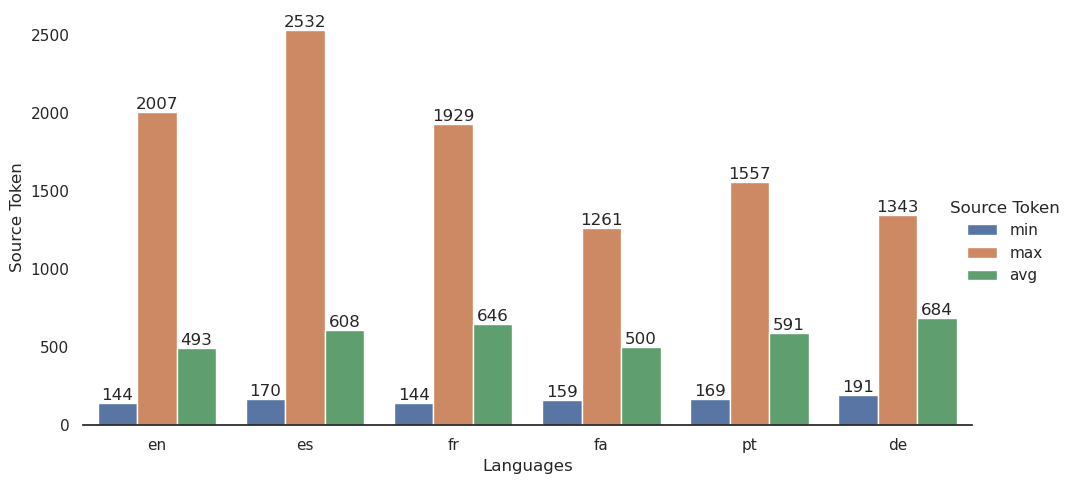

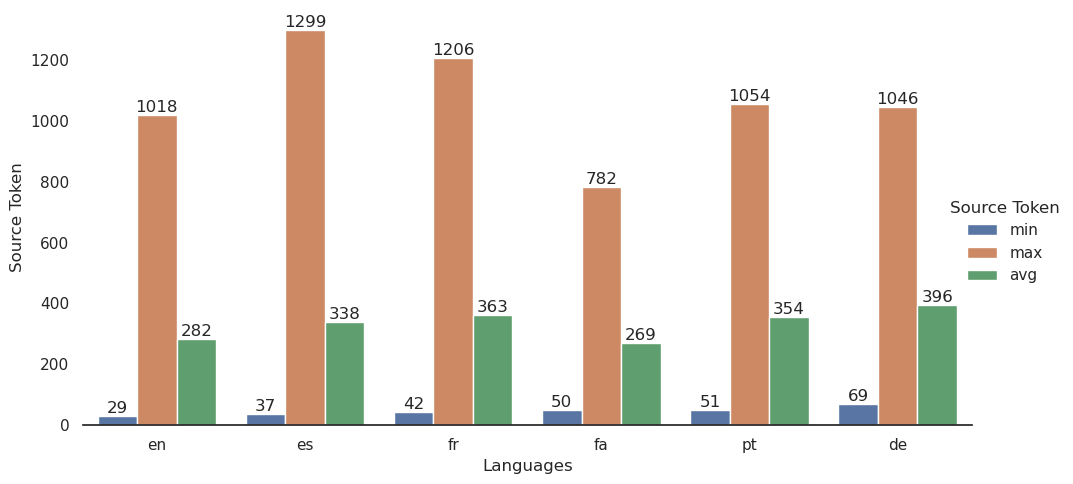

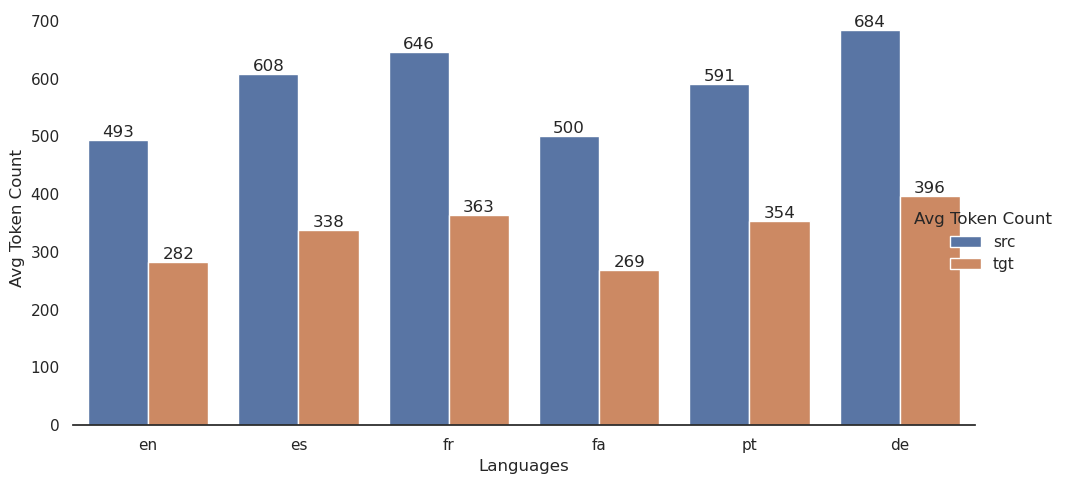

In [105]:
# Source Token
g5 = sns.catplot(
    data=df_tokens,
    kind="bar",
    x="lang",
    y="src_token_count",
    hue="value",
    errorbar="sd",
    height=5,
    aspect=2,
)
g5.despine(left=True)
g5.set_axis_labels("Languages", "Source Token")
g5.legend.set_title("Source Token")

ax5 = g5.facet_axis(0, 0)

for c in ax5.containers:
    labels = [int(v.get_height()) if not math.isnan(v.get_height()) else "" for v in c]
    ax5.bar_label(c, labels=labels)
    
# Target Token
g5 = sns.catplot(
    data=df_tokens,
    kind="bar",
    x="lang",
    y="tgt_token_count",
    hue="value",
    errorbar="sd",
    height=5,
    aspect=2,
)
g5.despine(left=True)
g5.set_axis_labels("Languages", "Target Token")
g5.legend.set_title("Target Token")

ax5 = g5.facet_axis(0, 0)

for c in ax5.containers:
    labels = [int(v.get_height()) if not math.isnan(v.get_height()) else "" for v in c]
    ax5.bar_label(c, labels=labels)
    
# Avg Token Count
g4 = sns.catplot(
    data=df_avg_token_test,
    kind="bar",
    x="lang",
    y="avg",
    hue="src/tgt",
    errorbar="sd",
    height=5,
    aspect=2,
)
g4.despine(left=True)
g4.set_axis_labels("Languages", "Avg Token Count")
g4.legend.set_title("Avg Token Count")

ax4 = g4.facet_axis(0, 0)

for c in ax4.containers:
    labels = [int(v.get_height()) if not math.isnan(v.get_height()) else "" for v in c]
    ax4.bar_label(c, labels=labels)

# Novelty

In [42]:
novelty = {"lang": [], "perc": []}
for lang, articles in json_data.items():
    percentages = []
    for article in articles:
        tgt_token = word_tokenize(article["tgt"], language=map_nltk_lang(lang))
        src_token = word_tokenize(article["src"], language=map_nltk_lang(lang))
        
        tgt_token = set([x.lower() for x in tgt_token])
        src_token = set([x.lower() for x in src_token])
        
        diff = tgt_token.difference(src_token)
        
        print("#############################")
        print(json.dumps(article, indent=2, ensure_ascii=False))
        print('----')
        print(diff)
        print('----')
        print(str(len(diff)) + "/" + str(len(tgt_token)))
        print('----')
        print(len(diff) / len(tgt_token) * 100)
        

        percentages.append(len(diff) / len(tgt_token))
        
        
        #res = []
        #for word in tgt_token:
        #    if word in src_token:
        #        res.append(True)
        #    else:
        #        res.append(False)

        #percentages.append((sum(res) / len(res)) * 100)
        
    
    novelty["lang"].append(lang)
    novelty["perc"].append(round(mean(percentages) * 100, 2))

#############################
{
  "doi": "10.1002-14651858.CD004572.pub2",
  "src": "Thirty-two randomized controlled trials meeting the inclusion criteria were identified. Many had significant methodological flaws. Change in neurological function, our primary outcome measure, was assessed in 29 trials, but sufficient data for meta-analysis were only available in 13 studies, involving 879 treated participants and 909 controls. There was no overall significant difference between the treated and control groups (SMD -0.25, 95% CI -0.56 to 0.05), although one subgroup analysis (four trials using tolrestat) favored treatment. A benefit for neuropathic symptoms was suggested by a group of trials using a dichotomized endpoint (improvement or not), but this was contradicted by another group of trials which measured symptoms on a continuous scale. There was no overall benefit on nerve conduction parameters (27 studies) or foot ulceration (one study). Quality of life was not assessed in any of t

#############################
{
  "doi": "10.1002-14651858.CD002088.pub3",
  "src": "Wir planten eine Subgruppenanalyse für die einzelnen zugrundeliegenden Erkrankungen durchzuführen. Wir schlossen fünf kleinere Studien ein, die insgesamt 234 Teilnehmer randomisierten. Bei zwei Studien wurde ein geringes Risiko für Bias festgestellt; keine der eingeschlossenen Studien besaß eine statistisch adäquate Teststärke. Zwei Studien nutzten Aufmerksamkeitssteuerung, die anderen drei verglichen eine Intervention mit einer anderen Intervention (in allen Fällen war das eine Intervention versus Standardversorgung). Bei unserer Suche fand sich keine Studie, die eine Intervention mit Nichtbehandlung verglich. Ebenso wurden keine Studien identifiziert, die Variationen in zeitlichem Ablauf, Intensität oder Dosis (d.h. Intensität über die Zeit) bei ansonsten gleicher Intervention verglichen. Vier Studien untersuchten ausschließlich Personen nach Schlaganfall; eine Studie schloss überwiegend Personen nac

In [43]:
df_novelty = pd.DataFrame(data=novelty)
df_novelty

,lang,perc
0,en,42.67
1,es,44.03
2,fr,42.50
3,fa,47.46
4,pt,52.12
5,de,49.56


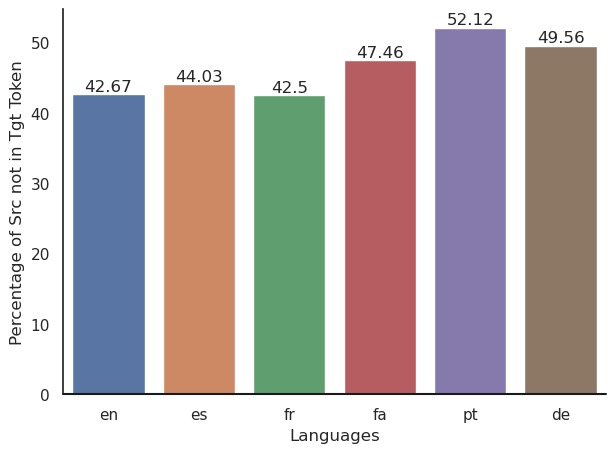

In [44]:
f1, ax6 = plt.subplots(1, 1, figsize=(7, 5), sharex=True)

sns.barplot(x="lang", y="perc", data=df_novelty, ax=ax6)
ax6.axhline(0, color="k", clip_on=False)
ax6.bar_label(ax6.containers[0])
ax6.set(xlabel='Languages', ylabel='Percentage of Src not in Tgt Token')

sns.despine(bottom=True)